In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import glob 
import os 
from PIL import Image
from scipy import fftpack
from cmcrameri import show_cmaps
from cmcrameri import cm
from scipy import signal

In [4]:
saveplots = os.path.join('./', 'plots/yellots')
if os.path.isdir(saveplots) == False:
    os.makedirs(saveplots)

In [5]:
real_file_locations = '/media/maria/ESP/ExperimentalData'
real_file_start = 'ImageIndex'
look_for = os.path.join(real_file_locations, '*.jpg')
real_images = glob.glob(look_for)

In [6]:
real_images[0]

'/media/maria/ESP/ExperimentalData/ImageIndex10frame13.jpg'

In [7]:
# erica_location = f'/media/maria/MariaData/VaryingDefocousLevels/DoublePass_DefocusTest0.0/ConeMosaic0/Session0/Images'
erica_location = f'/media/maria/MariaData/ZeroMS/DoublePass_Mean0.03_STD0.02/ConeMosaic0/Session0/Images'
look_for = os.path.join(erica_location, '*.bmp')
erica_images = glob.glob(look_for)
print(len(erica_images))

8


In [8]:
erica_images[0]

'/media/maria/MariaData/ZeroMS/DoublePass_Mean0.03_STD0.02/ConeMosaic0/Session0/Images/Image_000.bmp'

In [9]:

real_image = Image.open(real_images[0])
erica_image = Image.open(erica_images[0])

In [10]:
new_real = real_image.convert('L')
new_erica = erica_image.convert('L')

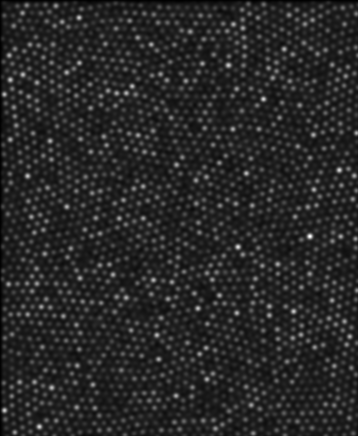

In [11]:
display(new_erica)

In [12]:
real_image = np.array(new_real)
real_image = real_image[:350, :350]
erica_image = np.array(new_erica)
erica_image = erica_image[:350, :350]
# erica_image.shap

In [13]:
fft_original_real = np.fft.fft2(real_image)
fft_shifted_real = np.fft.fftshift(fft_original_real)
shiffted_fft_mag_real = np.abs(fft_shifted_real)

fft_original_erica = np.fft.fft2(erica_image)
fft_shifted_erica = np.fft.fftshift(fft_original_erica)
shiffted_fft_mag_erica = np.abs(fft_shifted_erica)

Text(0.5, 1.0, 'ERICA Log Magnitude')

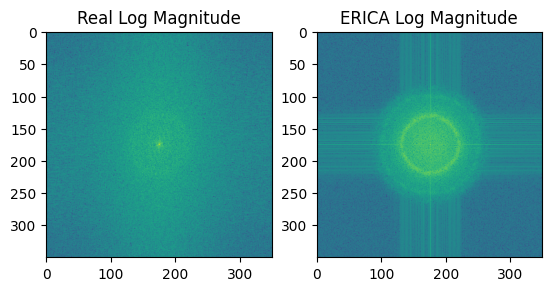

In [14]:
fig, (ax, bx) = plt.subplots(1, 2)
ax.imshow(np.log(np.abs(shiffted_fft_mag_real)))
ax.set_title('Real Log Magnitude')

bx.imshow(np.log(np.abs(shiffted_fft_mag_erica)))
bx.set_title('ERICA Log Magnitude')

In [15]:
# Slice the mag
shiffted_fft_mag_erica.shape

(350, 350)

In [16]:
# Horizonatal
middle_x = shiffted_fft_mag_erica.shape[1] // 2
middle_y = shiffted_fft_mag_erica.shape[0] // 2

horizontal_x_erica = shiffted_fft_mag_erica[middle_x, :]
horizontal_x_real = shiffted_fft_mag_real[middle_x, :]

vertical_y_erica= shiffted_fft_mag_erica[:, middle_y]
vertical_y_real = shiffted_fft_mag_real[:, middle_y]

In [17]:
def AverageRadialSpectrum(shiffted_fft_mag_erica, shiffted_fft_mag_real):
    middle_col = shiffted_fft_mag_erica.shape[1] // 2
    middle_row = shiffted_fft_mag_erica.shape[0] // 2
    print(middle_col, middle_row)
    max_radial= np.ceil(np.sqrt(middle_col**2+middle_row**2)).astype(np.int32)
    print(max_radial)
    
    count = np.zeros((max_radial, 1))
    radial_profile_erica = np.zeros((max_radial, 1))
    radial_profile_real= np.zeros((max_radial, 1))
    for c in range(1, shiffted_fft_mag_erica.shape[1], 1):
        for r in range(1, shiffted_fft_mag_erica.shape[0], 1):
            radius = np.sqrt((r-middle_row)**2  + (c-middle_col)**2)
            curr_idx = int(np.ceil(radius))
    
            radial_profile_erica[curr_idx, 0] += shiffted_fft_mag_erica[r, c]
            radial_profile_real[curr_idx, 0] += shiffted_fft_mag_real[r, c]
            count[curr_idx, 0] += 1
    new_radial_profile_erica = radial_profile_erica/count
    new_radial_profile_real = radial_profile_real/count
    
    return new_radial_profile_erica, new_radial_profile_real

In [18]:

real_profiles = np.zeros((5, 248))
erica_profiles = np.zeros((5 ,248))

for i in range(5):
    real_image = Image.open(real_images[i])
    erica_image = Image.open(erica_images[i])

    new_real = real_image.convert('L')
    new_erica = erica_image.convert('L')

    real_image = np.array(new_real)
    real_image = real_image[:350, :350]
    erica_image = np.array(new_erica)
    erica_image = erica_image[:350, :350]

    fft_original_real = np.fft.fft2(real_image)
    fft_shifted_real = np.fft.fftshift(fft_original_real)
    shiffted_fft_mag_real = np.abs(fft_shifted_real)
    
    fft_original_erica = np.fft.fft2(erica_image)
    fft_shifted_erica = np.fft.fftshift(fft_original_erica)
    shiffted_fft_mag_erica = np.abs(fft_shifted_erica)

    new_radial_profile_erica, new_radial_profile_real = AverageRadialSpectrum(shiffted_fft_mag_erica, shiffted_fft_mag_real)

    real_profiles[i, :] = np.log(new_radial_profile_real[:, 0])
    erica_profiles[i, :] = np.log(new_radial_profile_erica[:, 0])


175 175
248
175 175
248
175 175
248
175 175
248
175 175
248


In [19]:
averaged_real_profiles = np.average(real_profiles, axis=0)
averaged_erica_profiles = np.average(erica_profiles, axis=0)

Text(0.5, 1.0, 'Averaged Radial Profile of Spectrum')

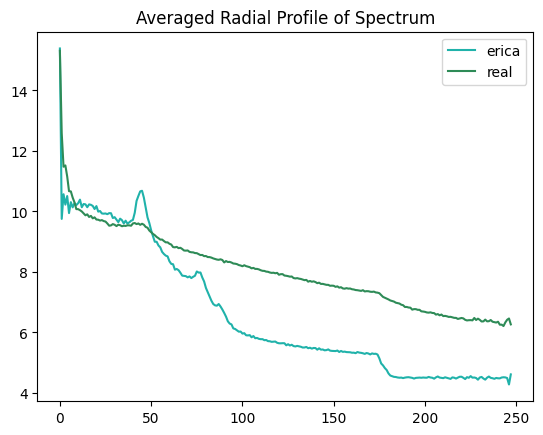

In [20]:

plt.plot(averaged_erica_profiles, label ='erica', color='lightseagreen')
plt.plot(averaged_real_profiles, label='real', color='seagreen')
plt.legend(loc="upper right")
plt.title('Averaged Radial Profile of Spectrum')

In [21]:
peaks = signal.find_peaks(averaged_erica_profiles)

In [22]:
peaks

(array([  2,   4,   6,   8,  11,  13,  16,  20,  22,  25,  27,  30,  33,
         36,  45,  64,  71,  75,  77,  87,  99, 101, 104, 106, 108, 111,
        113, 118, 122, 125, 127, 130, 135, 137, 139, 142, 144, 147, 152,
        154, 156, 161, 163, 168, 171, 173, 187, 191, 197, 199, 202, 207,
        211, 215, 220, 223, 225, 227, 231, 235, 239, 243]),
 {})

In [23]:
peaks, _ = signal.find_peaks(averaged_erica_profiles)

45


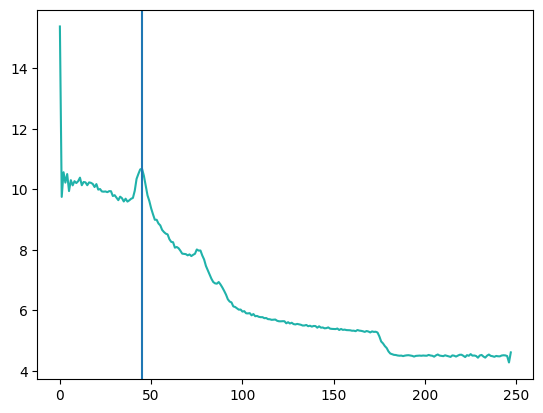

In [24]:
plt.plot(averaged_erica_profiles, label ='erica', color='lightseagreen')
# for xc in peaks[14]:
    # plt.axvline(x=xc)
plt.axvline(x = peaks[14])
print(peaks[14])

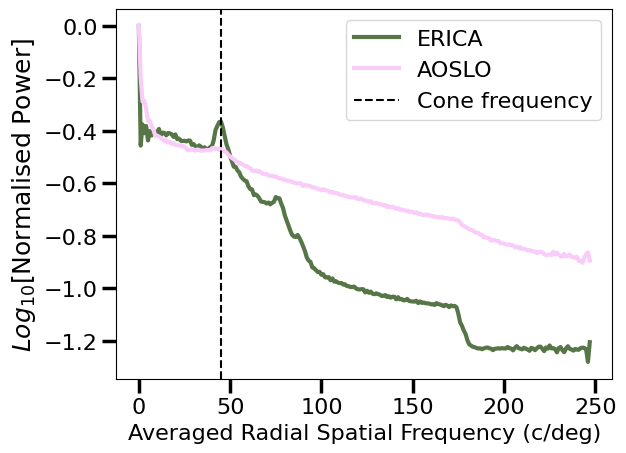

In [25]:
colours = cm.batlow(np.linspace(0.4,1,2))
norm_av_erica = np.log(averaged_erica_profiles / np.max(averaged_erica_profiles))
norm_av_real = np.log(averaged_real_profiles / np.max(averaged_real_profiles))

# plt.plot(averaged_erica_profiles, label ='ERICA', color=colours[0], linewidth=3)
# plt.plot(averaged_real_profiles, label='AOSLO', color=colours[1], linewidth=3)

plt.plot(norm_av_erica, label ='ERICA', color=colours[0], linewidth=3)
plt.plot(norm_av_real, label='AOSLO', color=colours[1], linewidth=3)
plt.axvline(x = peaks[14], label='Cone frequency', color='black', linestyle='--') 
plt.legend(loc="upper right",  fontsize=16)

plt.xlabel('Averaged Radial Spatial Frequency (c/deg)', fontsize=16)
plt.ylabel('$Log_{10}$[Normalised Power]',  fontsize=18)
# plt.title('Averaged Radial Profile of Power Spectrum')
plt.tick_params(axis='both', which='major', labelsize=16, width=2.5, length=10)
plt.savefig('Frequency.png',  bbox_inches='tight')

In [29]:
len(norm_av_erica[:175])

175

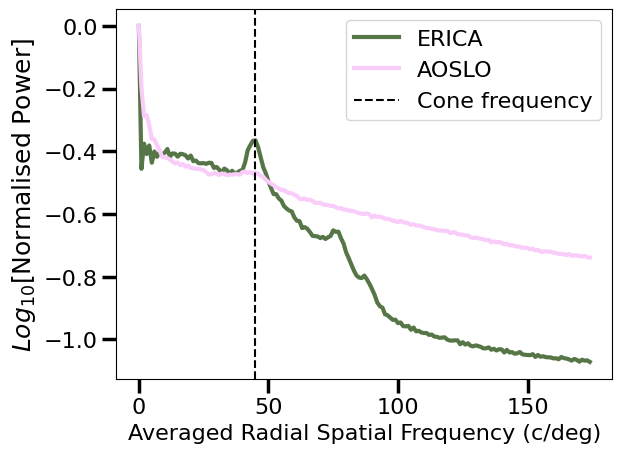

In [30]:
colours = cm.batlow(np.linspace(0.4,1,2))
norm_av_erica = np.log(averaged_erica_profiles / np.max(averaged_erica_profiles))
norm_av_real = np.log(averaged_real_profiles / np.max(averaged_real_profiles))

# plt.plot(averaged_erica_profiles, label ='ERICA', color=colours[0], linewidth=3)
# plt.plot(averaged_real_profiles, label='AOSLO', color=colours[1], linewidth=3)

plt.plot(norm_av_erica[:175], label ='ERICA', color=colours[0], linewidth=3)
plt.plot(norm_av_real[:175], label='AOSLO', color=colours[1], linewidth=3)
plt.axvline(x = peaks[14], label='Cone frequency', color='black', linestyle='--') 
plt.legend(loc="upper right",  fontsize=16)

plt.xlabel('Averaged Radial Spatial Frequency (c/image)', fontsize=16)
plt.ylabel('$Log_{10}$[Normalised Power]',  fontsize=18)
# plt.title('Averaged Radial Profile of Power Spectrum')
plt.tick_params(axis='both', which='major', labelsize=16, width=2.5, length=10)
plt.savefig('Frequency.png',  bbox_inches='tight')